<a href="https://colab.research.google.com/github/Juliodominguezcalderon/Talento_tech/blob/main/9_An%C3%A1lisis_de_Datos_Abiertos_(ICFES).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importamos las librerías a utilizar
import os
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import json as json
from google.colab import data_table
from vega_datasets import data
from wordcloud import WordCloud

In [4]:
# Cargar el dataset
df_resultados = pd.read_csv('/content/Saber_11__2020-2_20241130.csv')

# Mostrar el dataframe completo
display(df_resultados)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,SUIZA,F,03/03/2003 12:00:00 AM,20204,SB11202040211436,ESTUDIANTE,SUIZA,No,CUNDINAMARCA,...,55.0,81,A1,244,49,54.882365,3.0,3.0,PUBLICAR,NO
1,PEP,VENEZUELA,M,05/10/2002 12:00:00 AM,20204,SB11202040433216,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,33.0,6,A-,238,44,49.252311,2.0,2.0,PUBLICAR,NO
2,TI,VENEZUELA,F,12/14/2003 12:00:00 AM,20204,SB11202040244180,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,59.0,87,A2,325,94,40.733672,1.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,CE,VENEZUELA,M,04/12/2003 12:00:00 AM,20204,SB11202040210971,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,47.0,58,A-,238,45,48.217953,2.0,3.0,PUBLICAR,NO
4,TI,COLOMBIA,F,03/03/2004 12:00:00 AM,20204,SB11202040235382,ESTUDIANTE,COLOMBIA,No,CUNDINAMARCA,...,43.0,40,A-,202,19,60.912192,3.0,3.0,PUBLICAR,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504867,TI,COLOMBIA,M,12/26/2003 12:00:00 AM,20204,SB11202040105446,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,...,45.0,52,A-,282,75,45.311449,2.0,2.0,PUBLICAR,NO
504868,CC,COLOMBIA,M,10/27/1996 12:00:00 AM,20204,SB11202040168415,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,...,54.0,79,A1,257,59,38.124729,1.0,3.0,PUBLICAR,NO
504869,TI,COLOMBIA,F,01/14/2005 12:00:00 AM,20204,SB11202040185843,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,...,67.0,93,A2,330,95,53.586443,3.0,3.0,PUBLICAR,NO
504870,TI,COLOMBIA,M,06/14/2002 12:00:00 AM,20204,SB11202040168607,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,...,52.0,75,A1,290,80,58.316936,3.0,3.0,PUBLICAR,NO


In [5]:
# Consulta y validación de la cantidad de filas y columnas del dataframe
num_rows, num_cols = df_resultados.shape

# Imprimir mensaje y valores de salidas del dataframe
print(f'El DataFrame, tiene {num_rows} filas y {num_cols} columnas.')

El DataFrame, tiene 504872 filas y 81 columnas.


# Evaluación de calidad de los datos

In [6]:
# Vista de los primeros 5 registros.
df_resultados.head(5)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,SUIZA,F,03/03/2003 12:00:00 AM,20204,SB11202040211436,ESTUDIANTE,SUIZA,No,CUNDINAMARCA,...,55.0,81,A1,244,49,54.882365,3.0,3.0,PUBLICAR,NO
1,PEP,VENEZUELA,M,05/10/2002 12:00:00 AM,20204,SB11202040433216,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,33.0,6,A-,238,44,49.252311,2.0,2.0,PUBLICAR,NO
2,TI,VENEZUELA,F,12/14/2003 12:00:00 AM,20204,SB11202040244180,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,59.0,87,A2,325,94,40.733672,1.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,CE,VENEZUELA,M,04/12/2003 12:00:00 AM,20204,SB11202040210971,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,47.0,58,A-,238,45,48.217953,2.0,3.0,PUBLICAR,NO
4,TI,COLOMBIA,F,03/03/2004 12:00:00 AM,20204,SB11202040235382,ESTUDIANTE,COLOMBIA,No,CUNDINAMARCA,...,43.0,40,A-,202,19,60.912192,3.0,3.0,PUBLICAR,NO


In [7]:
# Identificación de porcentajes faltantes por columnas

df_resultados = df_resultados.replace(r'^\s*$', np.nan, regex=True)
percent_missing = df_resultados.isnull().sum() * 100 / len(df_resultados)
missing_value_df = pd.DataFrame({'Columnas': df_resultados.columns,
                                 'Porcentajes_vacios': percent_missing})
missing_value_df.sort_values(by="Porcentajes_vacios", ascending= False).reset_index(drop=True)

,Columnas,Porcentajes_vacios
0,COLE_BILINGUE,16.441197
1,FAMI_COMECEREALFRUTOSLEGUMBRE,4.013493
2,FAMI_TIENECOMPUTADOR,3.999826
3,FAMI_TRABAJOLABORPADRE,3.900196
4,FAMI_TIENEAUTOMOVIL,3.527429
...,...,...
76,COLE_JORNADA,0.000000
77,COLE_COD_MCPIO_UBICACION,0.000000
78,COLE_MCPIO_UBICACION,0.000000
79,COLE_COD_DEPTO_UBICACION,0.000000


In [8]:
# Isnull nos permite detectar datos nulos, simplificando este proceso independientemente de la dimensión de nuestra base de datos.
(df_resultados.head(10)).notnull()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [9]:
# Nombres de las columnas
df_resultados.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',


In [10]:
# Cantidad, información y tipo de dato de las 82 columnas del dataframe columnas
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504872 entries, 0 to 504871
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             504872 non-null  object 
 1   ESTU_NACIONALIDAD              504872 non-null  object 
 2   ESTU_GENERO                    504864 non-null  object 
 3   ESTU_FECHANACIMIENTO           504872 non-null  object 
 4   PERIODO                        504872 non-null  int64  
 5   ESTU_CONSECUTIVO               504872 non-null  object 
 6   ESTU_ESTUDIANTE                504872 non-null  object 
 7   ESTU_PAIS_RESIDE               504872 non-null  object 
 8   ESTU_TIENEETNIA                501879 non-null  object 
 9   ESTU_DEPTO_RESIDE              504870 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          504870 non-null  float64
 11  ESTU_MCPIO_RESIDE              504870 non-null  object 
 12  ESTU_COD_RESIDE_MCPIO         

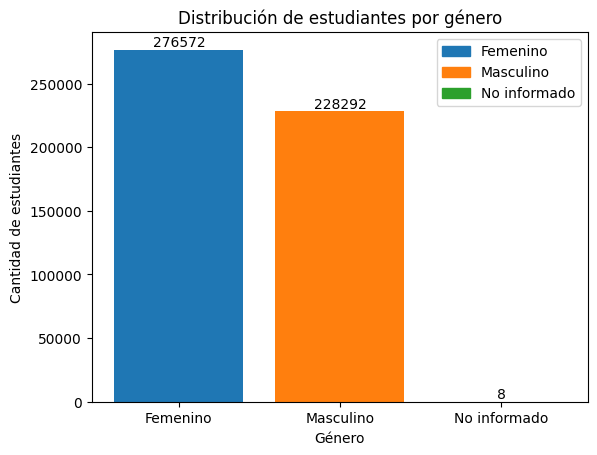

In [11]:
# Columna de prueba, exploración visual del comportamiento de algunos datos

# Se definen colores para cada categoría de la columna 'ESTU_GENERO'
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Aseguramos que los valores de la columna Estu_Genero sean texto
etiquetas = df_resultados['ESTU_GENERO'].value_counts(dropna=False).index.astype(str)

#Damos nombre a la etiquetas del eje x
etiquetas= ['Femenino', 'Masculino', 'No informado']

# Se crea el gráfico de barras con colores y leyenda
plt.bar(etiquetas,
        df_resultados['ESTU_GENERO'].value_counts(dropna=False), color=colors)



# Se agrega la cantidad a las barras
for i, v in enumerate(df_resultados['ESTU_GENERO'].value_counts(dropna=False)):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Se establece los nombres de los ejes y el título
plt.xlabel('Género')
plt.ylabel('Cantidad de estudiantes')
plt.title('Distribución de estudiantes por género')

# Se crea la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = ['Femenino', 'Masculino', 'No informado']
custom_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
handles = custom_handles + handles
labels = custom_labels + labels
plt.legend(handles, labels, loc='best')

# Visualización del gráfico
plt.show()

Con base en la gráfica de la columna 'ESTU_GENERO', se evidencia que hay una cantidad no informada, no hubo respuesta de 8 estudiantes para la caracterización del tipo de género; esa cantidad representa el 0.002% de la totalidad del DataFrame.

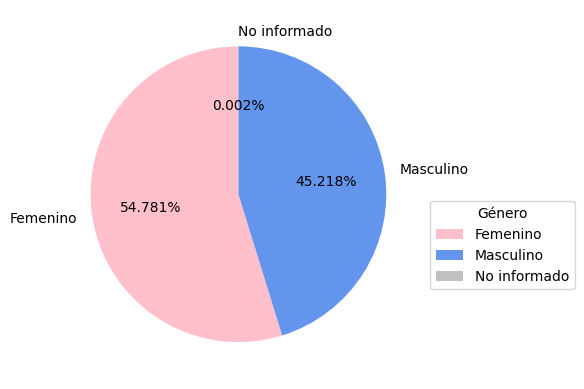

ESTU_GENERO
F      276572
M      228292
NaN         8
Name: count, dtype: int64


In [12]:
# Cantidad de registros por el tipo de genero

# Obtener los valores y las etiquetas
x_values = df_resultados['ESTU_GENERO'].value_counts(dropna=False).values
etiquetas = df_resultados['ESTU_GENERO'].value_counts(dropna=False).index.astype(str)
etiquetas = ['Femenino', 'Masculino', 'No informado']

# establecer colores
colores = ['#FFC0CB', '#6495ED', '#C0C0C0']

# crear gráfico de torta
plt.pie(x_values, labels=etiquetas, colors=colores, autopct='%1.3f%%', startangle=90)

# agregar leyenda
plt.legend(title='Género', loc='upper left', bbox_to_anchor=(1.0, 0.5))

# mostrar gráfico
plt.show()

# imprimir resultados
print(df_resultados['ESTU_GENERO'].value_counts(dropna=False))


In [13]:
# reemplazar valores "NaN"
df_resultados['ESTU_GENERO'] = df_resultados['ESTU_GENERO'].fillna('Desconocido')

# contar registros de la columna 'ESTU_GENERO'
df_resultados['ESTU_GENERO'].value_counts()

,count
ESTU_GENERO,
F,276572
M,228292
Desconocido,8


# **Columna ESTU_FECHANACIMIENTO**

In [14]:
# generar conteo de registros por valor único en la columna ESTU_FECHANACIMIENTO
df_fecha_naci = df_resultados['ESTU_FECHANACIMIENTO'].value_counts()

df_fecha_naci

,count
ESTU_FECHANACIMIENTO,
09/23/2003 12:00:00 AM,942
09/09/2003 12:00:00 AM,884
09/24/2003 12:00:00 AM,844
10/03/2003 12:00:00 AM,834
11/05/2003 12:00:00 AM,832
...,...
07/18/2008 12:00:00 AM,1
11/27/1993 12:00:00 AM,1
03/11/1976 12:00:00 AM,1


In [15]:
# limpiar valores problemáticos
df_resultados['ESTU_FECHANACIMIENTO'] = df_resultados['ESTU_FECHANACIMIENTO'].str.replace('\r', '')
df_resultados['ESTU_FECHANACIMIENTO'] = df_resultados['ESTU_FECHANACIMIENTO'].str.replace('\n', '')

# convertir columna 'ESTU_FECHANACIMIENTO' al formato de fecha y hora de pandas
df_resultados['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df_resultados['ESTU_FECHANACIMIENTO'], errors='coerce')

# obtener solo el año de nacimiento
df_resultados['ANIO_NACIMIENTO'] = df_resultados['ESTU_FECHANACIMIENTO'].dt.year

# Si deseamos, tenemos la opción de eliminar o no columnas innecesarias, en este caso la columna 'ESTU_FECHANACIMIENTO' será reemplazada por 'ANIO_NACIMIENTO'
df_resultados = df_resultados.drop('ESTU_FECHANACIMIENTO', axis=1)

# mostrar resultados
df_resultados.head(3)


<ipython-input-15-27fe511fdeb1>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_resultados['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df_resultados['ESTU_FECHANACIMIENTO'], errors='coerce')


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E,ANIO_NACIMIENTO
0,TI,SUIZA,F,20204,SB11202040211436,ESTUDIANTE,SUIZA,No,CUNDINAMARCA,25.0,...,81,A1,244,49,54.882365,3.0,3.0,PUBLICAR,NO,2003.0
1,PEP,VENEZUELA,M,20204,SB11202040433216,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,25.0,...,6,A-,238,44,49.252311,2.0,2.0,PUBLICAR,NO,2002.0
2,TI,VENEZUELA,F,20204,SB11202040244180,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,25.0,...,87,A2,325,94,40.733672,1.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD,2003.0


In [16]:
# mostrar resultados
df_resultados['ANIO_NACIMIENTO'].value_counts()

,count
ANIO_NACIMIENTO,
2003.0,214703
2004.0,111081
2002.0,102669
2001.0,41785
2000.0,12446
...,...
1939.0,1
1940.0,1
1941.0,1


In [17]:
años = df_resultados['ANIO_NACIMIENTO'].unique()
años = pd.DataFrame(años, columns=['Años'])
años = años.sort_values(by='Años', ascending=False)
años

,Años
36,2020.0
74,2019.0
73,2018.0
68,2015.0
67,2014.0
...,...
70,1941.0
71,1940.0
77,1939.0
72,1900.0


In [18]:
# contar registros por año de nacimiento
conteo_por_anio = df_resultados['ANIO_NACIMIENTO'].value_counts()

# filtrar años de interés, iniciaremos por los nacidos entre 1999 y 2020
filtro = (conteo_por_anio.index >= 1999) & (conteo_por_anio.index <= 2020)
conteo_por_anio_filtrado = conteo_por_anio.loc[filtro]

# mostrar resultados
print(conteo_por_anio_filtrado)
plt.show()

ANIO_NACIMIENTO
2003.0    214703
2004.0    111081
2002.0    102669
2001.0     41785
2000.0     12446
2005.0      4409
1999.0      4147
2006.0       159
2020.0        80
2011.0        37
2013.0        32
2007.0        31
2010.0        29
2009.0        25
2012.0        24
2008.0        24
2014.0         8
2015.0         3
2019.0         3
2018.0         2
Name: count, dtype: int64


In [19]:
# contar registros por año de nacimiento
conteo_por_anio = df_resultados['ANIO_NACIMIENTO'].value_counts()

# filtrar años de interés
filtro = (conteo_por_anio.index >= 2009) & (conteo_por_anio.index <= 2020)
conteo_por_anio_filtrado = conteo_por_anio.loc[filtro]

# mostrar resultados
print(conteo_por_anio_filtrado)
plt.show()

ANIO_NACIMIENTO
2020.0    80
2011.0    37
2013.0    32
2010.0    29
2009.0    25
2012.0    24
2014.0     8
2015.0     3
2019.0     3
2018.0     2
Name: count, dtype: int64


In [20]:
print("Entre los años 2009 y 2020, hay un total de:", conteo_por_anio_filtrado.sum())

Entre los años 2009 y 2020, hay un total de: 243


243 estudiantes posiblemente diligenciaron el año de nacimiento erroneamente, lo anterior representa el 0,005% del total de registro de la columna, por lo anterior se procede a eliminar dichos registros

In [21]:
# Identificar los índices de los registros a eliminar
indices_eliminar = df_resultados[(df_resultados['ANIO_NACIMIENTO'] >= 2009) & (df_resultados['ANIO_NACIMIENTO'] <= 2020)].index

# Eliminar los registros
df_resultados = df_resultados.drop(indices_eliminar)

# Verificar que se hayan eliminado los registros
print(df_resultados['ANIO_NACIMIENTO'].value_counts())
plt.show()

print("Se eliminaron:", conteo_por_anio_filtrado.sum(),'registros que pertencen a los outliers de nacidos entre 2009 y 2020, es decir, edades entre 11 y 0 años')


ANIO_NACIMIENTO
2003.0    214703
2004.0    111081
2002.0    102669
2001.0     41785
2000.0     12446
           ...  
1944.0         1
1941.0         1
1940.0         1
1939.0         1
1947.0         1
Name: count, Length: 69, dtype: int64
Se eliminaron: 243 registros que pertencen a los outliers de nacidos entre 2009 y 2020, es decir, edades entre 11 y 0 años


In [22]:
import matplotlib.pyplot as plt

# Suponiendo que df_resultados es tu DataFrame original

# Contar registros por año de nacimiento
conteo_por_anio = df_resultados['ANIO_NACIMIENTO'].value_counts().reset_index()

# Renombrar las columnas correctamente
conteo_por_anio.columns = ['Anio', 'Cantidad']

# Convertir la columna 'Anio' a tipo numérico
conteo_por_anio['Anio'] = pd.to_numeric(conteo_por_anio['Anio'], errors='coerce')

# Filtrar años de interés (1997 a 2008)
filtro = (conteo_por_anio['Anio'] >= 1997) & (conteo_por_anio['Anio'] <= 2008)
conteo_por_anio_1997_2007 = conteo_por_anio.loc[filtro]

# Mostrar resultados
print(conteo_por_anio_1997_2007.to_string(index=False))
plt.show()

# Calcular y mostrar el total
print("Entre los nacidos de los años 1997 y 2008, hay un total de", conteo_por_anio_1997_2007['Cantidad'].sum(), "estudiantes que presentaron el examen ICFES en 2020-2")



  Anio  Cantidad
2003.0    214703
2004.0    111081
2002.0    102669
2001.0     41785
2000.0     12446
2005.0      4409
1999.0      4147
1998.0      2012
1997.0      1328
2006.0       159
2007.0        31
2008.0        24
Entre los nacidos de los años 1997 y 2008, hay un total de 494794 estudiantes que presentaron el examen ICFES en 2020-2


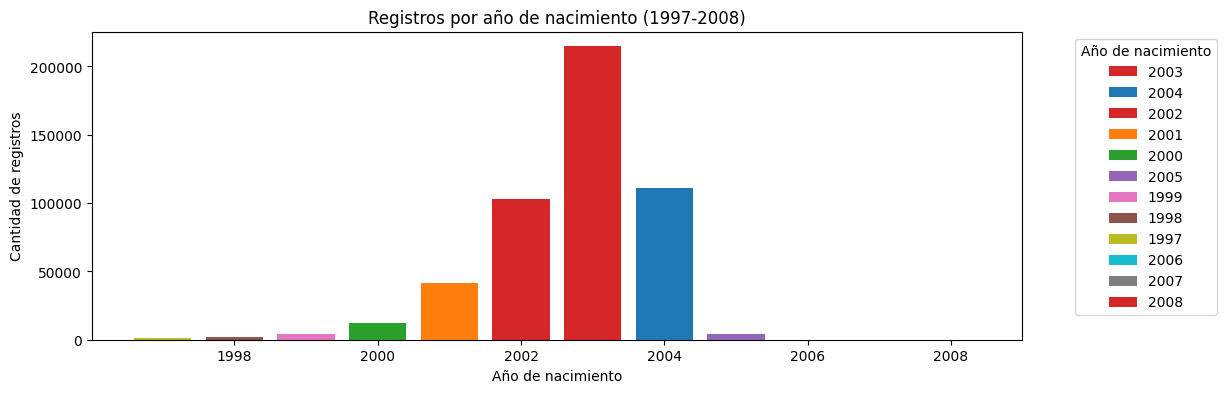

In [23]:
# crear gráfico de barras
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
ax.bar(conteo_por_anio_1997_2007['Anio'], conteo_por_anio_1997_2007['Cantidad'], color=['tab:red', 'tab:blue', 'tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:pink', 'tab:brown', 'tab:olive', 'tab:cyan', 'tab:gray'], label=conteo_por_anio_1997_2007['Anio'].astype(int).astype(str))

# agregar leyendas y etiquetas
ax.set_xlabel('Año de nacimiento')
ax.set_ylabel('Cantidad de registros')
ax.set_title('Registros por año de nacimiento (1997-2008)')
ax.legend(title='Año de nacimiento', bbox_to_anchor=(1.05, 1), loc='upper left')

# mostrar resultados
plt.show()

Los estudiantes nacidos en el 2003, cuya oscila entre 16 y 17 representan el 43% del total de los estudiantes que presentaron las pruebas ICFES en el segundo semestre de 2020.

In [24]:
#	Validación de nacidos de 1990 a 1997, se conservaran dichos registros por la cantidad acorde a la población filtrada.

# contar registros por año de nacimiento
conteo_por_anio = df_resultados['ANIO_NACIMIENTO'].value_counts().reset_index()

# Renombrar las columnas
conteo_por_anio.columns = ['Anio', 'Cantidad']

# filtrar años de interés
filtro = (conteo_por_anio['Anio'] >= 1990) & (conteo_por_anio['Anio'] <= 1997)
conteo_por_anio_1990_1997 = conteo_por_anio.loc[filtro].rename(columns={'Anio': 'Anio', 'ANIO_NACIMIENTO': 'Cantidad'})

# mostrar resultados
print(conteo_por_anio_1990_1997.to_string(index=False))
plt.show()

print("Entre los nacidos de los años 1990 y 1997, hay un total de", conteo_por_anio_1990_1997['Cantidad'].sum(),"estudiantes que presentaron el examen ICFES en 2020-2")


  Anio  Cantidad
1997.0      1328
1996.0      1046
1995.0       846
1994.0       775
1993.0       609
1992.0       506
1991.0       489
1990.0       464
Entre los nacidos de los años 1990 y 1997, hay un total de 6063 estudiantes que presentaron el examen ICFES en 2020-2


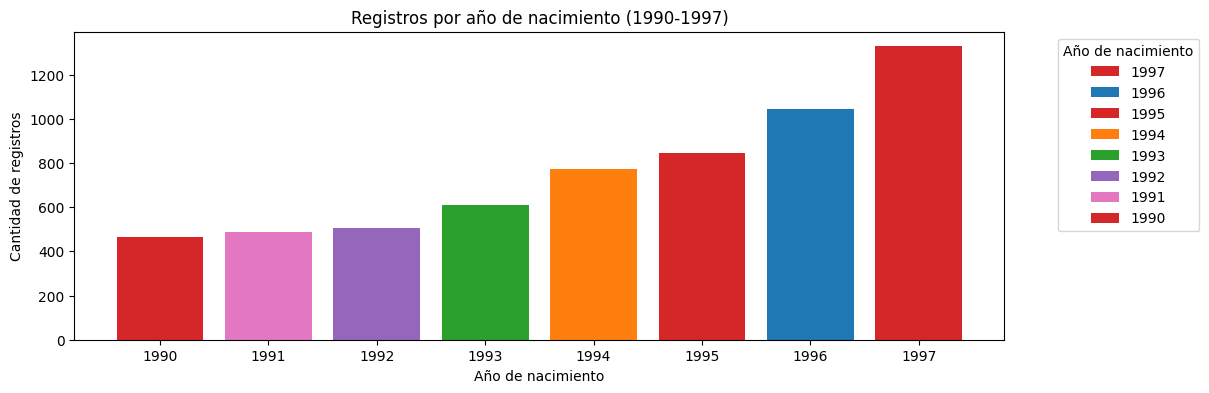

Entre los nacidos de los años 1990 y 1997, hay un total de 6063 estudiantes que presentaron el examen ICFES en 2020-2


In [25]:
# crear gráfico de barras
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
ax.bar(conteo_por_anio_1990_1997['Anio'], conteo_por_anio_1990_1997['Cantidad'], color=['tab:red', 'tab:blue', 'tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:pink'], label=conteo_por_anio_1990_1997['Anio'].astype(int).astype(str))

# agregar leyendas y etiquetas
ax.set_xlabel('Año de nacimiento')
ax.set_ylabel('Cantidad de registros')
ax.set_title('Registros por año de nacimiento (1990-1997)')
ax.legend(title='Año de nacimiento', bbox_to_anchor=(1.05, 1), loc='upper left')

# mostrar resultados
plt.show()

print("Entre los nacidos de los años 1990 y 1997, hay un total de", conteo_por_anio_1990_1997['Cantidad'].sum(),"estudiantes que presentaron el examen ICFES en 2020-2")


In [26]:
#	Validación de nacidos de 1980 a 1989, se conservaran dichos registros por la cantidad acorde a la población filtrada.

# contar registros por año de nacimiento
conteo_por_anio = df_resultados['ANIO_NACIMIENTO'].value_counts().reset_index()

# Renombrar las columnas
conteo_por_anio.columns = ['Anio', 'Cantidad']

# filtrar años de interés
filtro = (conteo_por_anio['Anio'] >= 1980) & (conteo_por_anio['Anio'] <= 1989)
conteo_por_anio_1980_1989 = conteo_por_anio.loc[filtro].rename(columns={'Anio': 'Anio', 'ANIO_NACIMIENTO': 'Cantidad'})

# mostrar resultados
print(conteo_por_anio_1980_1989.to_string(index=False))
plt.show()

print("Entre los nacidos de los años 1980 y 1989, hay un total de", conteo_por_anio_1980_1989['Cantidad'].sum(),"estudiantes que presentaron el examen ICFES en 2020-2")


  Anio  Cantidad
1988.0       390
1989.0       389
1987.0       340
1986.0       338
1985.0       316
1984.0       289
1982.0       272
1983.0       256
1981.0       236
1980.0       214
Entre los nacidos de los años 1980 y 1989, hay un total de 3040 estudiantes que presentaron el examen ICFES en 2020-2


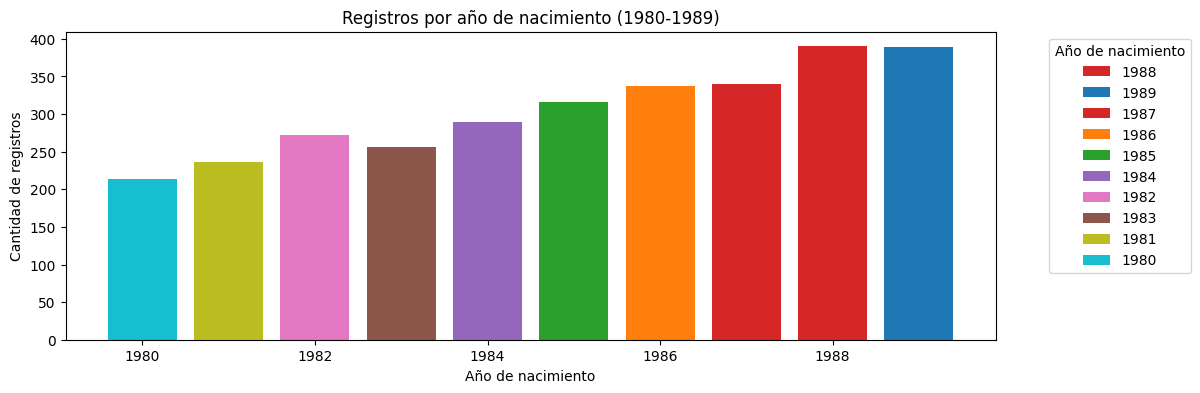

Entre los nacidos de los años 1980 y 1989, hay un total de 3040 estudiantes que presentaron el examen ICFES en 2019-2


In [27]:
# crear gráfico de barras
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
ax.bar(conteo_por_anio_1980_1989['Anio'], conteo_por_anio_1980_1989['Cantidad'], color=['tab:red', 'tab:blue', 'tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:pink', 'tab:brown', 'tab:olive', 'tab:cyan'], label=conteo_por_anio_1980_1989['Anio'].astype(int).astype(str))

# agregar leyendas y etiquetas
ax.set_xlabel('Año de nacimiento')
ax.set_ylabel('Cantidad de registros')
ax.set_title('Registros por año de nacimiento (1980-1989)')
ax.legend(title='Año de nacimiento', bbox_to_anchor=(1.05, 1), loc='upper left')

# mostrar resultados
plt.show()

print("Entre los nacidos de los años 1980 y 1989, hay un total de", conteo_por_anio_1980_1989['Cantidad'].sum(),"estudiantes que presentaron el examen ICFES en 2019-2")


In [28]:
#	Validación de nacidos de 1970 a 1979, se conservaran dichos registros por la cantidad acorde a la población filtrada.

# contar registros por año de nacimiento
conteo_por_anio = df_resultados['ANIO_NACIMIENTO'].value_counts().reset_index()


# Renombrar las columnas
conteo_por_anio.columns = ['Anio', 'Cantidad']


# filtrar años de interés
filtro = (conteo_por_anio['Anio'] >= 1970) & (conteo_por_anio['Anio'] <= 1979)
conteo_por_anio_1970_1979 = conteo_por_anio.loc[filtro].rename(columns={'Anio': 'Anio', 'ANIO_NACIMIENTO': 'Cantidad'})

# mostrar resultados
print(conteo_por_anio_1970_1979.to_string(index=False))
plt.show()

print("Entre los nacidos de los años 1970 y 1979, hay un total de", conteo_por_anio_1970_1979['Cantidad'].sum(),"estudiantes que presentaron el examen ICFES en 2020-2")

  Anio  Cantidad
1979.0       203
1978.0       168
1977.0       162
1976.0       148
1974.0       122
1975.0       122
1972.0       111
1970.0       105
1971.0        93
1973.0        89
Entre los nacidos de los años 1970 y 1979, hay un total de 1323 estudiantes que presentaron el examen ICFES en 2020-2


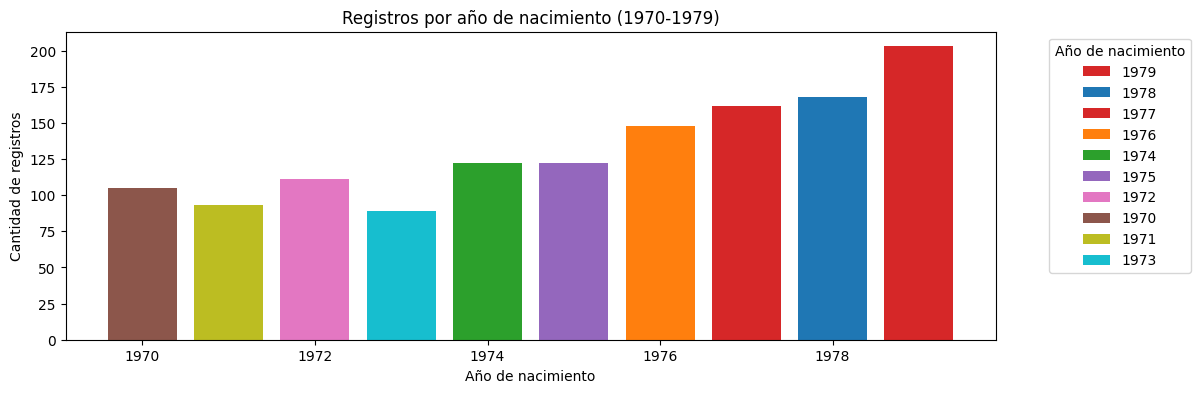


Entre los nacidos de los años 1970 y 1979, hay un total de 1323 estudiantes que presentaron el examen ICFES en 2020-2


In [29]:
# crear gráfico de barras
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
ax.bar(conteo_por_anio_1970_1979['Anio'], conteo_por_anio_1970_1979['Cantidad'], color=['tab:red', 'tab:blue', 'tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:pink', 'tab:brown', 'tab:olive', 'tab:cyan', 'tab:gray'], label=conteo_por_anio_1970_1979['Anio'].astype(int).astype(str))

# agregar leyendas y etiquetas
ax.set_xlabel('Año de nacimiento')
ax.set_ylabel('Cantidad de registros')
ax.set_title('Registros por año de nacimiento (1970-1979)')
ax.legend(title='Año de nacimiento', bbox_to_anchor=(1.05, 1), loc='upper left')

# mostrar resultados
plt.show()

print("\nEntre los nacidos de los años 1970 y 1979, hay un total de", conteo_por_anio_1970_1979['Cantidad'].sum(),"estudiantes que presentaron el examen ICFES en 2020-2")

In [30]:
# Identificar los índices de los registros a eliminar
indices_eliminar = df_resultados[(df_resultados['ANIO_NACIMIENTO'] >= 1910) & (df_resultados['ANIO_NACIMIENTO'] <= 1949)].index

# Eliminar los registros
df_resultados = df_resultados.drop(indices_eliminar)

# Verificar que se hayan eliminado los registros
print(df_resultados['ANIO_NACIMIENTO'].value_counts())
plt.show()

ANIO_NACIMIENTO
2003.0    214703
2004.0    111081
2002.0    102669
2001.0     41785
2000.0     12446
2005.0      4409
1999.0      4147
1998.0      2012
1997.0      1328
1996.0      1046
1995.0       846
1994.0       775
1993.0       609
1992.0       506
1991.0       489
1990.0       464
1988.0       390
1989.0       389
1987.0       340
1986.0       338
1985.0       316
1984.0       289
1982.0       272
1983.0       256
1981.0       236
1980.0       214
1979.0       203
1978.0       168
1977.0       162
2006.0       159
1976.0       148
1975.0       122
1974.0       122
1972.0       111
1970.0       105
1971.0        93
1973.0        89
1969.0        82
1968.0        75
1966.0        73
1967.0        71
1965.0        60
1964.0        54
1962.0        51
1963.0        36
2007.0        31
1960.0        30
1961.0        28
2008.0        24
1959.0        23
1957.0        23
1958.0        22
1956.0        18
1953.0        15
1900.0        13
1954.0        10
1955.0         7
1951.0         

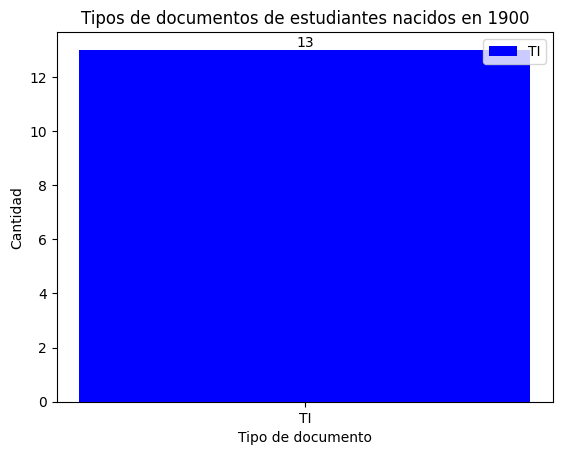

In [31]:
# Seleccionar los registros correspondientes a estudiantes nacidos en 1900
estudiantes_1900 = df_resultados[df_resultados['ANIO_NACIMIENTO'] == 1900]

# Contar los tipos de documentos
tipos_documento = estudiantes_1900['ESTU_TIPODOCUMENTO'].value_counts()

# Crear el gráfico de barras
fig, ax = plt.subplots()
barras = ax.bar(tipos_documento.index, tipos_documento.values, color=['blue', 'orange', 'green', 'red', 'purple'])

# Agregar la cantidad de valores de las barras
for bar in barras:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom')

# Agregar la leyenda y título
ax.set_xlabel('Tipo de documento')
ax.set_ylabel('Cantidad')
ax.set_title('Tipos de documentos de estudiantes nacidos en 1900')
ax.legend(barras, tipos_documento.index)

plt.show()

Teniendo en cuenta que los 13 estudiante con fecha de nacimiento 1900 declararon que su documento de indentidad es Tarjeta de identidad los clasificaremos nacidos en 2003

In [32]:
# Seleccionar los registros correspondientes a estudiantes nacidos en 1900 y con tipo de documento TI
filtro = (df_resultados['ANIO_NACIMIENTO'] == 1900) & (df_resultados['ESTU_TIPODOCUMENTO'] == 'TI')
df_resultados.loc[filtro, 'ANIO_NACIMIENTO'] = 2003

In [33]:
conteo_por_anio = df_resultados['ANIO_NACIMIENTO'].value_counts().reset_index()
conteo_por_anio.columns = ['año', 'cantidad']
conteo_por_anio = conteo_por_anio.sort_values('año', ascending=False)

print(conteo_por_anio)

       año  cantidad
48  2008.0        24
45  2007.0        31
29  2006.0       159
5   2005.0      4409
1   2004.0    111081
0   2003.0    214716
2   2002.0    102669
3   2001.0     41785
4   2000.0     12446
6   1999.0      4147
7   1998.0      2012
8   1997.0      1328
9   1996.0      1046
10  1995.0       846
11  1994.0       775
12  1993.0       609
13  1992.0       506
14  1991.0       489
15  1990.0       464
17  1989.0       389
16  1988.0       390
18  1987.0       340
19  1986.0       338
20  1985.0       316
21  1984.0       289
23  1983.0       256
22  1982.0       272
24  1981.0       236
25  1980.0       214
26  1979.0       203
27  1978.0       168
28  1977.0       162
30  1976.0       148
31  1975.0       122
32  1974.0       122
36  1973.0        89
33  1972.0       111
35  1971.0        93
34  1970.0       105
37  1969.0        82
38  1968.0        75
40  1967.0        71
39  1966.0        73
41  1965.0        60
42  1964.0        54
44  1963.0        36
43  1962.0   

In [34]:
# Mostrar el dataframe completo
display(df_resultados)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E,ANIO_NACIMIENTO
0,TI,SUIZA,F,20204,SB11202040211436,ESTUDIANTE,SUIZA,No,CUNDINAMARCA,25.0,...,81,A1,244,49,54.882365,3.0,3.0,PUBLICAR,NO,2003.0
1,PEP,VENEZUELA,M,20204,SB11202040433216,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,25.0,...,6,A-,238,44,49.252311,2.0,2.0,PUBLICAR,NO,2002.0
2,TI,VENEZUELA,F,20204,SB11202040244180,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,25.0,...,87,A2,325,94,40.733672,1.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD,2003.0
3,CE,VENEZUELA,M,20204,SB11202040210971,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,25.0,...,58,A-,238,45,48.217953,2.0,3.0,PUBLICAR,NO,2003.0
4,TI,COLOMBIA,F,20204,SB11202040235382,ESTUDIANTE,COLOMBIA,No,CUNDINAMARCA,25.0,...,40,A-,202,19,60.912192,3.0,3.0,PUBLICAR,NO,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504867,TI,COLOMBIA,M,20204,SB11202040105446,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,11.0,...,52,A-,282,75,45.311449,2.0,2.0,PUBLICAR,NO,2003.0
504868,CC,COLOMBIA,M,20204,SB11202040168415,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,11.0,...,79,A1,257,59,38.124729,1.0,3.0,PUBLICAR,NO,1996.0
504869,TI,COLOMBIA,F,20204,SB11202040185843,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,11.0,...,93,A2,330,95,53.586443,3.0,3.0,PUBLICAR,NO,2005.0
504870,TI,COLOMBIA,M,20204,SB11202040168607,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,11.0,...,75,A1,290,80,58.316936,3.0,3.0,PUBLICAR,NO,2002.0


Se conservaron el 99,95% de los datos originales del dataset

# Columna ESTU_TIENEETNIA

In [35]:
# generar conteo de registros por valor único en la columna ESTU_TIENEETNIA que hace referencia si pertenece o no a un tipo de etnia.

df_etnia = df_resultados['ESTU_TIENEETNIA'].value_counts().reset_index()
df_etnia.columns = ['Etnia', 'Cantidad']
df_etnia

,Etnia,Cantidad
0,No,469714
1,Si,31923


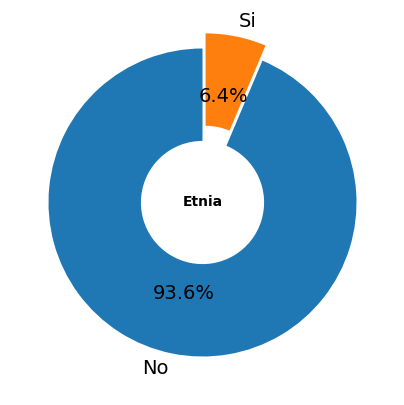

In [36]:
# generar conteo de registros por valor único en la columna ESTU_TIENEETNIA que hace referencia si pertenece o no a un tipo de etnia.
df_etnia = df_resultados['ESTU_TIENEETNIA'].value_counts().reset_index()
df_etnia.columns = ['Etnia', 'Cantidad']

# configurar etiquetas
labels = df_etnia['Etnia']
sizes = df_etnia['Cantidad']
# Change here, using two values for explode
explode = (0, 0.1)  # separar una porción del gráfico

# configurar la figura y el eje
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

# crear gráfico de dona
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.6})

# agregar etiqueta central
ax.text(0, 0, 'Etnia', horizontalalignment='center', verticalalignment='center', fontsize=10, fontweight='bold')

# mostrar resultados
plt.show()

# **Columna ESTU_ETNIA** NO EXISTE

In [37]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504614 entries, 0 to 504871
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             504614 non-null  object 
 1   ESTU_NACIONALIDAD              504614 non-null  object 
 2   ESTU_GENERO                    504614 non-null  object 
 3   PERIODO                        504614 non-null  int64  
 4   ESTU_CONSECUTIVO               504614 non-null  object 
 5   ESTU_ESTUDIANTE                504614 non-null  object 
 6   ESTU_PAIS_RESIDE               504614 non-null  object 
 7   ESTU_TIENEETNIA                501637 non-null  object 
 8   ESTU_DEPTO_RESIDE              504612 non-null  object 
 9   ESTU_COD_RESIDE_DEPTO          504612 non-null  float64
 10  ESTU_MCPIO_RESIDE              504612 non-null  object 
 11  ESTU_COD_RESIDE_MCPIO          504612 non-null  float64
 12  FAMI_ESTRATOVIVIENDA           4876

# **Columna ESTU_DEPTO_RESIDE**

In [38]:
# generar conteo de registros por valor único en la columna ESTU_DEPTO_RESIDE que hace referencia al departamento de residencia

df_dto = df_resultados['ESTU_DEPTO_RESIDE'].value_counts()
df_dto

,count
ESTU_DEPTO_RESIDE,
BOGOTÁ,77298
ANTIOQUIA,70450
VALLE,35427
CUNDINAMARCA,33637
ATLANTICO,28575
BOLIVAR,24167
SANTANDER,23754
CORDOBA,19442
TOLIMA,15791


In [39]:
df_dto.info()

<class 'pandas.core.series.Series'>
Index: 34 entries, BOGOTÁ to EXTRANJERO
Series name: count
Non-Null Count  Dtype
--------------  -----
34 non-null     int64
dtypes: int64(1)
memory usage: 1.6+ KB


In [40]:
# Se valida por filtro de valores vacios

registros_vacios = df_resultados[df_resultados['ESTU_DEPTO_RESIDE'] == '']
display(registros_vacios)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E,ANIO_NACIMIENTO


# **Columna ESTU_MCPIO_RESIDE**

In [41]:
# Generar conteo de registros por valor único en la columna ESTU_MCPIO_RESIDE que hace referencia al municipio de residencia

df_muni = df_resultados['ESTU_MCPIO_RESIDE'].value_counts()
display(df_muni)

,count
ESTU_MCPIO_RESIDE,
BOGOTÁ D.C.,77298
MEDELLÍN,27470
CALI,14870
BARRANQUILLA,14637
CARTAGENA DE INDIAS,12807
...,...
PACOA,7
BUSBANZÁ,6
SAN FELIPE,4


In [42]:
# Se valida por filtro de valores vacios

registros_vacios = df_resultados[df_resultados['ESTU_MCPIO_RESIDE'] == '']
display(registros_vacios)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E,ANIO_NACIMIENTO


# Columna **FAMI_ESTRATOVIVIENDA**

In [43]:
# generar conteo de registros por valor único en la columna FAMI_ESTRATOVIVIENDAA que hace referencia al estrato de la vivienda de los estudiantes.

df_estrato = df_resultados['FAMI_ESTRATOVIVIENDA'].value_counts()
df_estrato

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,182236
Estrato 1,152788
Estrato 3,103486
Estrato 4,23443
Sin Estrato,15620
Estrato 5,7018
Estrato 6,3081


In [44]:
df_resultados['FAMI_ESTRATOVIVIENDA'].replace(['Vacías', '-'], 'No sabe', inplace=True)

<ipython-input-44-92bc05d20d6c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resultados['FAMI_ESTRATOVIVIENDA'].replace(['Vacías', '-'], 'No sabe', inplace=True)


In [45]:
df_estrato = df_resultados['FAMI_ESTRATOVIVIENDA'].value_counts()
df_estrato

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,182236
Estrato 1,152788
Estrato 3,103486
Estrato 4,23443
Sin Estrato,15620
Estrato 5,7018
Estrato 6,3081


# **FAMI_PERSONASHOGAR**

In [46]:
# generar conteo de registros por valor único en la columna ESTU_TIENEETNIA que hace referencia si pertenece o no a un tipo de etnia.

df_personas_hogar = df_resultados['FAMI_PERSONASHOGAR'].value_counts()
df_personas_hogar


,count
FAMI_PERSONASHOGAR,
3 a 4,239954
5 a 6,155418
7 a 8,41127
1 a 2,36671
9 o más,16284


In [47]:
df_resultados['FAMI_PERSONASHOGAR'].replace(['Vacías', '-'], 'Desconocido', inplace=True)

# generar conteo de registros por valor único en la columna ESTU_TIENEETNIA que hace referencia si pertenece o no a un tipo de etnia.

df_personas_hogar = df_resultados['FAMI_PERSONASHOGAR'].value_counts()
df_personas_hogar

<ipython-input-47-08540a3df332>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resultados['FAMI_PERSONASHOGAR'].replace(['Vacías', '-'], 'Desconocido', inplace=True)


,count
FAMI_PERSONASHOGAR,
3 a 4,239954
5 a 6,155418
7 a 8,41127
1 a 2,36671
9 o más,16284


# Columna **FAMI_CUARTOSHOGAR**

In [48]:
# generar conteo de registros por valor único en la columna ESTU_TIENEETNIA que hace referencia si pertenece o no a un tipo de etnia.

df_cuartos_hogar = df_resultados['FAMI_CUARTOSHOGAR'].value_counts()
df_cuartos_hogar

,count
FAMI_CUARTOSHOGAR,
Tres,189315
Dos,171000
Cuatro,67193
Uno,25267
Cinco,22912
Seis o mas,13101


In [49]:
df_resultados['FAMI_CUARTOSHOGAR'].replace(['Vacías', '-'], 'No sabe', inplace=True)

df_cuartos_hogar = df_resultados['FAMI_CUARTOSHOGAR'].value_counts()
df_cuartos_hogar

<ipython-input-49-cf08d0e31bf1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resultados['FAMI_CUARTOSHOGAR'].replace(['Vacías', '-'], 'No sabe', inplace=True)


,count
FAMI_CUARTOSHOGAR,
Tres,189315
Dos,171000
Cuatro,67193
Uno,25267
Cinco,22912
Seis o mas,13101


# **Columna FAMI_EDUCACIONPADRE**

In [50]:
# generar conteo de registros por valor único en la columna ESTU_TIENEETNIA que hace referencia si pertenece o no a un tipo de etnia.

df_edu_padre = df_resultados['FAMI_EDUCACIONPADRE'].value_counts()
df_edu_padre

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,120255
Primaria incompleta,92055
Secundaria (Bachillerato) incompleta,65270
Educación profesional completa,46717
Primaria completa,45908
Técnica o tecnológica completa,33058
No sabe,29857
Ninguno,20780
Educación profesional incompleta,10227


In [53]:

df_resultados['FAMI_EDUCACIONPADRE'].replace(['Vacías', '-', 'No Aplica'], 'No sabe', inplace=True)

df_edu_padre = df_resultados['FAMI_EDUCACIONPADRE'].value_counts()
df_edu_padre

<ipython-input-53-47627ef88917>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resultados['FAMI_EDUCACIONPADRE'].replace(['Vacías', '-', 'No Aplica'], 'No sabe', inplace=True)


,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,120255
Primaria incompleta,92055
Secundaria (Bachillerato) incompleta,65270
Educación profesional completa,46717
Primaria completa,45908
No sabe,37589
Técnica o tecnológica completa,33058
Ninguno,20780
Educación profesional incompleta,10227


# Coloumna **FAMI_EDUCACIONMADRE**

In [52]:
# generar conteo de registros por valor único en la columna ESTU_TIENEETNIA que hace referencia si pertenece o no a un tipo de etnia.

df_edu_madre = df_resultados['FAMI_EDUCACIONMADRE'].value_counts()
df_edu_madre

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,137602
Primaria incompleta,71254
Secundaria (Bachillerato) incompleta,68145
Educación profesional completa,56311
Técnica o tecnológica completa,50454
Primaria completa,45964
Técnica o tecnológica incompleta,15190
Educación profesional incompleta,12615
Ninguno,12349


In [51]:
df_resultados['FAMI_EDUCACIONMADRE'].replace(['Vacías', '-', 'No Aplica'], 'No sabe', inplace=True)

df_edu_madre = df_resultados['FAMI_EDUCACIONMADRE'].value_counts()
df_edu_madre

<ipython-input-51-2a208b6d8809>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resultados['FAMI_EDUCACIONMADRE'].replace(['Vacías', '-', 'No Aplica'], 'No sabe', inplace=True)


,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,137602
Primaria incompleta,71254
Secundaria (Bachillerato) incompleta,68145
Educación profesional completa,56311
Técnica o tecnológica completa,50454
Primaria completa,45964
Técnica o tecnológica incompleta,15190
Educación profesional incompleta,12615
Ninguno,12349


# **Columna FAMI_TRABAJOLABORPADRE**

In [54]:
# generar conteo de registros por valor único en la columna ESTU_TIENEETNIA que hace referencia si pertenece o no a un tipo de etnia.

df_trabajo_padre = df_resultados['FAMI_TRABAJOLABORPADRE'].value_counts()
df_trabajo_padre

,count
FAMI_TRABAJOLABORPADRE,
"Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc",87089
"Es agricultor, pesquero o jornalero",67147
"Trabaja por cuenta propia (por ejemplo plomero, electricista)",57077
"Es operario de máquinas o conduce vehículos (taxita, chofer)",47176
No sabe,44931
"Trabaja como profesional (por ejemplo médico, abogado, ingeniero)",37562
"Trabaja como personal de limpieza, mantenimiento, seguridad o construcción",33041
"Trabaja en el hogar, no trabaja o estudia",32087
Es vendedor o trabaja en atención al público,30951


In [55]:
df_resultados['FAMI_TRABAJOLABORPADRE'].replace(['Vacías', '-', 'No aplica'], 'No sabe', inplace=True)

df_trabajo_padre = df_resultados['FAMI_TRABAJOLABORPADRE'].value_counts()
df_trabajo_padre

<ipython-input-55-ec71f2b420ee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resultados['FAMI_TRABAJOLABORPADRE'].replace(['Vacías', '-', 'No aplica'], 'No sabe', inplace=True)


,count
FAMI_TRABAJOLABORPADRE,
"Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc",87089
"Es agricultor, pesquero o jornalero",67147
"Trabaja por cuenta propia (por ejemplo plomero, electricista)",57077
"Es operario de máquinas o conduce vehículos (taxita, chofer)",47176
No sabe,44931
"Trabaja como profesional (por ejemplo médico, abogado, ingeniero)",37562
"Trabaja como personal de limpieza, mantenimiento, seguridad o construcción",33041
"Trabaja en el hogar, no trabaja o estudia",32087
Es vendedor o trabaja en atención al público,30951


# **Columna FAMI_TRABAJOLABORMADRE**

In [56]:
df_resultados['FAMI_TRABAJOLABORMADRE'].replace(['Vacías', '-', 'No aplica'], 'No sabe', inplace=True)

df_trabajo_madre = df_resultados['FAMI_TRABAJOLABORMADRE'].value_counts()
df_trabajo_madre


<ipython-input-56-5c1dbd55872d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resultados['FAMI_TRABAJOLABORMADRE'].replace(['Vacías', '-', 'No aplica'], 'No sabe', inplace=True)


,count
FAMI_TRABAJOLABORMADRE,
"Trabaja en el hogar, no trabaja o estudia",188031
"Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc",73676
"Trabaja como personal de limpieza, mantenimiento, seguridad o construcción",40657
"Trabaja como profesional (por ejemplo médico, abogado, ingeniero)",40318
Es vendedor o trabaja en atención al público,38504
"Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)",38216
"Trabaja por cuenta propia (por ejemplo plomero, electricista)",17385
"Es agricultor, pesquero o jornalero",15986
No sabe,13376


# **# TIENEN INTERNET?**

In [69]:
# generar conteo de registros por valor único en la columna ESTU_TIENEETNIA que hace referencia si pertenece o no a un tipo de etnia.

df_internet = df_resultados['FAMI_TIENEINTERNET'].value_counts()
df_internet

,count
FAMI_TIENEINTERNET,
Si,342648
No,148314


In [70]:
df_internet.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, Si to No
Series name: count
Non-Null Count  Dtype
--------------  -----
2 non-null      int64
dtypes: int64(1)
memory usage: 140.0+ bytes


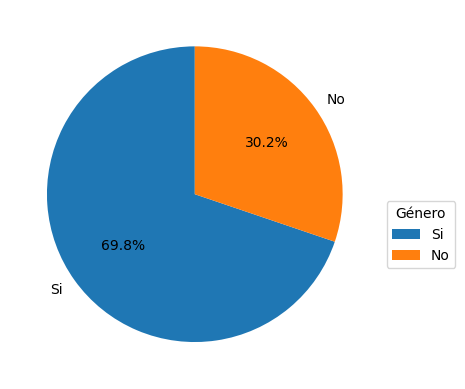

FAMI_TIENEINTERNET
Si    342648
No    148314
Name: count, dtype: int64


In [81]:
# Cantidad de registros por el tipo de genero

# Obtener los valores y las etiquetas
etiquetas = df_internet.index.value_counts(dropna=False).index.astype(str)
#etiquetas = ['Femenino', 'Masculino', 'No informado']

# crear gráfico de torta
plt.pie(df_internet.values, labels=etiquetas, autopct='%1.1f%%', startangle=90)

# agregar leyenda
plt.legend(title='Género', loc='upper left', bbox_to_anchor=(1.0, 0.5))

# mostrar gráfico
plt.show()

# imprimir resultados
print(df_internet)

Esta información indica que el estado debe intensificar esfuerzos para disminuir la brecha de acceso a intenet que a su vez contribuye a obtener información actualizada.

**FAMI_TIENECOMPUTADOR**

In [83]:
# generar conteo de registros por valor único en la columna ESTU_TIENEETNIA que hace referencia si pertenece o no a un tipo de etnia.

df_pc = df_resultados['FAMI_TIENECOMPUTADOR'].value_counts()
df_pc

,count
FAMI_TIENECOMPUTADOR,
Si,293357
No,191080


# **FAMI_NUMLIBROS**

In [84]:
# generar conteo de registros por valor único en la columna ESTU_TIENEETNIA que hace referencia si pertenece o no a un tipo de etnia.

df_libros = df_resultados['FAMI_NUMLIBROS'].value_counts()
df_libros


,count
FAMI_NUMLIBROS,
0 A 10 LIBROS,206745
11 A 25 LIBROS,151851
26 A 100 LIBROS,100607
MÁS DE 100 LIBROS,31582


**FAMI_SITUACIONECONOMICA**

In [86]:
# generar conteo de registros por valor único en la columna FAMI_SITUACIONECONOMICA
df_econo = df_resultados['FAMI_SITUACIONECONOMICA'].value_counts()
df_econo

,count
FAMI_SITUACIONECONOMICA,
Igual,291332
Peor,109089
Mejor,87894


# **ESTU_DEDICACIONLECTURADIARIA**

In [87]:
df_lectura = df_resultados['ESTU_DEDICACIONLECTURADIARIA'].value_counts()
df_lectura

,count
ESTU_DEDICACIONLECTURADIARIA,
30 minutos o menos,189303
Entre 30 y 60 minutos,132478
No leo por entretenimiento,95600
Entre 1 y 2 horas,51046
Más de 2 horas,21720


**ESTU_DEDICACIONINTERNET**

In [88]:
df_internet = df_resultados['ESTU_DEDICACIONINTERNET'].value_counts()
df_internet

,count
ESTU_DEDICACIONINTERNET,
Entre 1 y 3 horas,150481
Más de 3 horas,134426
Entre 30 y 60 minutos,109677
30 minutos o menos,66528
No Navega Internet,28891


# **ESTU_HORASSEMANATRABAJA**

In [91]:
df_estu_traba = df_resultados['ESTU_HORASSEMANATRABAJA'].value_counts()
df_estu_traba

,count
ESTU_HORASSEMANATRABAJA,
No trabaja,293688
Menos de 10 horas,95233
Entre 11 y 20 horas,51016
Más de 30 horas,26107
Entre 21 y 30 horas,21600


In [92]:
df_resultados['ESTU_HORASSEMANATRABAJA'].replace(['0'], 'No trabaja', inplace=True)

df_internet = df_resultados['ESTU_HORASSEMANATRABAJA'].value_counts()
df_internet

,count
ESTU_HORASSEMANATRABAJA,
No trabaja,293688
Menos de 10 horas,95233
Entre 11 y 20 horas,51016
Más de 30 horas,26107
Entre 21 y 30 horas,21600


# **ESTU_TIPOREMUNERACION**

In [93]:
df_tipo_remu = df_resultados['ESTU_TIPOREMUNERACION'].value_counts()
df_tipo_remu

,count
ESTU_TIPOREMUNERACION,
No,324554
"Si, en efectivo",141584
"Si, en especie",11375
"Si, en efectivo y especie",9469


# **Columna COLE_BILINGUE**

In [94]:
df_cole = df_resultados['COLE_BILINGUE'].value_counts()
df_cole

,count
COLE_BILINGUE,
N,416476
S,5193


Tipo de Colegio - columna **COLE_CARACTER**

In [95]:
df_caracter = df_resultados['COLE_CARACTER'].value_counts()
df_caracter

,count
COLE_CARACTER,
ACADÉMICO,259297
TÉCNICO/ACADÉMICO,169088
TÉCNICO,55222
NO APLICA,6851


**COLE_NATURALEZA**

In [96]:
df_cole_natu = df_resultados['COLE_NATURALEZA'].value_counts()
df_cole_natu

,count
COLE_NATURALEZA,
OFICIAL,391313
NO OFICIAL,113301


**COLE_CALENDARIO**

In [97]:
df_calen = df_resultados['COLE_CALENDARIO'].value_counts()
df_calen

,count
COLE_CALENDARIO,
A,502435
OTRO,1804
B,375


**COLE_SEDE_PRINCIPAL**

In [98]:
df_sede = df_resultados['COLE_SEDE_PRINCIPAL'].value_counts()
df_sede

,count
COLE_SEDE_PRINCIPAL,
S,480585
N,24029


**COLE_JORNADA**

In [99]:
df_jornada = df_resultados['COLE_JORNADA'].value_counts()
df_jornada

,count
COLE_JORNADA,
MAÑANA,200492
UNICA,132146
COMPLETA,77473
TARDE,48800
SABATINA,25108
NOCHE,20595


In [100]:
# luego de realizar la limpieza exportamos el DataFrame a un archivo CSV
df_resultados.to_csv('saber1120202.csv', index=False)

Unicamente las columnas indicadas en el scritpt fueron objeto de limpieza y análisis